In [1]:
from sklearn.decomposition import PCA
import sklearn.datasets 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo

Função pra calcular o PCA e pegar os 2 melhores fatores

In [2]:
def aplly_pca(df, target_name): #aqui o target tem que ser a string do nome da coluna rapaziada
    targets = df[target_name]
    df_numeric = df.select_dtypes(include=['number'])
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_numeric)
    df_pca = pd.DataFrame(df_pca, columns=['Componente 1', 'Componente 2'])

    explained_variance_ratio = pca.explained_variance_ratio_
    total_explained_variance = explained_variance_ratio.sum()
    print(f'Variação total explicada pelos dois primeiros componentes: {total_explained_variance * 100:.2f}%')

    #aqui to voltando os targets
    df_pca[target_name] = targets.reset_index(drop=True)

    return df_pca

In [3]:
def plot_pca(df, target_name):
    sns.scatterplot(data=df, x='Componente 1', y='Componente 2', hue=target_name)

In [4]:
def ler_zip(folder_name):
    with open('data/'+folder_name+'/'+folder_name+'.names', 'r') as file:
        column_names = file.readline().strip().split(',')

    # Lendo o arquivo de dados para um DataFrame do Pandas
    df = pd.read_csv('data/'+folder_name+'/'+folder_name+'.data')
    return df


DATASET 1: IRIS - **SEPARÁVEL**

In [5]:
iris = sns.load_dataset('iris')
iris = iris[iris['species'] != 'virginica']
iris_pca = aplly_pca(iris, "species")

Variação total explicada pelos dois primeiros componentes: 97.98%


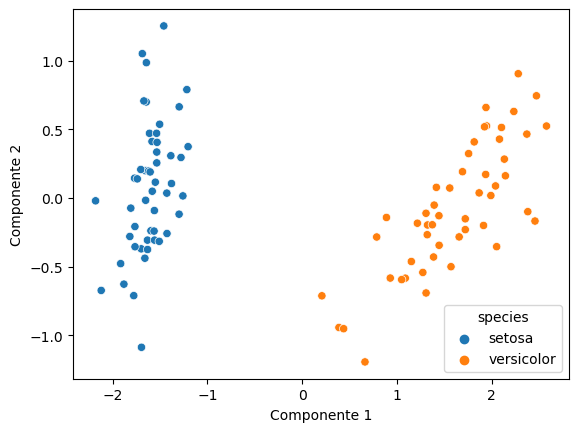

In [6]:
plot_pca(iris_pca, 'species')

DATASET 2: VINHO

In [7]:
vinho_data = sklearn.datasets.load_wine()
vinho = pd.DataFrame(vinho_data.data, columns=vinho_data.feature_names)
vinho['target'] = vinho_data.target
vinho_pca = aplly_pca(vinho, 'target')
vinho_pca = vinho_pca[vinho_pca['target'] != 1]

Variação total explicada pelos dois primeiros componentes: 99.98%


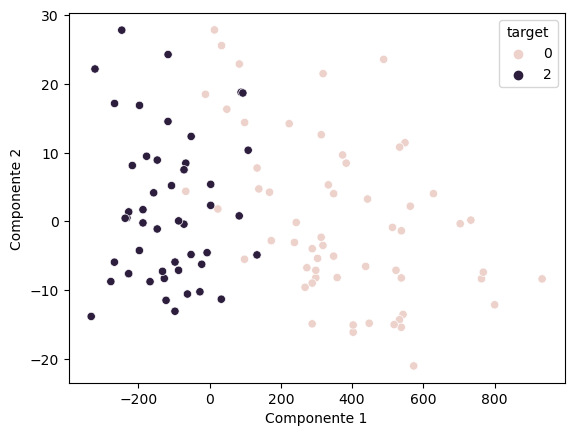

In [8]:
plot_pca(vinho_pca, 'target')

DATASET 3: BREAST CANCER

In [9]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()
breast_cancer = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer['target'] = breast_cancer_data.target
breast_pca = aplly_pca(breast_cancer, 'target')

Variação total explicada pelos dois primeiros componentes: 99.82%


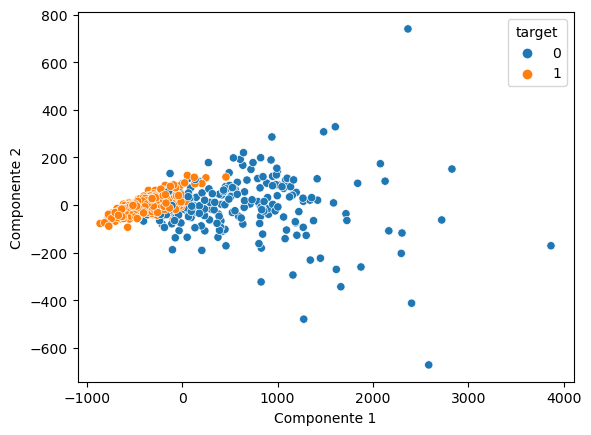

In [10]:
plot_pca(breast_pca, 'target')

DATASET 4: pinguins - **SEPARÁVEL**

In [11]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins = penguins[penguins['species'] != 'Chinstrap']
penguins = penguins[penguins['sex'] != 'Female']
penguins_pca = aplly_pca(penguins, 'species')

Variação total explicada pelos dois primeiros componentes: 100.00%


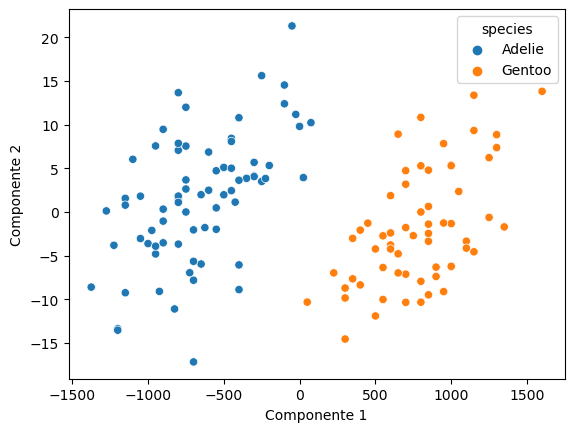

In [12]:
plot_pca(penguins_pca, 'species')

DATASET 5: wheat seeds - **SEPARÁVEL**

https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci/data?select=seeds.csv

In [13]:
seeds = pd.read_csv('data/seeds.csv')
seeds = seeds[seeds['Type'] != 1]
seeds_pca = aplly_pca(seeds, 'Type')

Variação total explicada pelos dois primeiros componentes: 99.46%


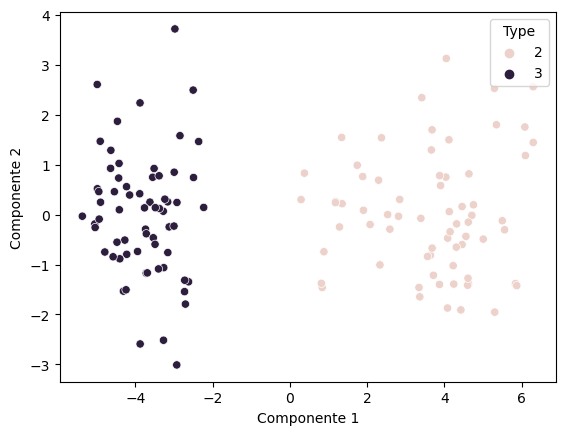

In [14]:
plot_pca(seeds_pca, 'Type')

DATASET 6: Glass - **SEPARÁVEL**

https://archive.ics.uci.edu/dataset/42/glass+identification

In [15]:
def retorna_pca_uci(id_num, target_name):
    data = fetch_ucirepo(id=id_num)
    A = data.data.features
    y = data.data.targets
    feat = pd.DataFrame(A)
    tar = pd.DataFrame(y)
    df = pd.concat([feat, tar], axis=1)
    df = df.dropna()

    df_pca = aplly_pca(df, target_name)
    return df_pca

In [16]:
glass_pca = retorna_pca_uci(42, 'Type_of_glass')
glass_pca = glass_pca[(glass_pca['Type_of_glass'] == 5) | (glass_pca['Type_of_glass'] == 2)]

Variação total explicada pelos dois primeiros componentes: 81.08%


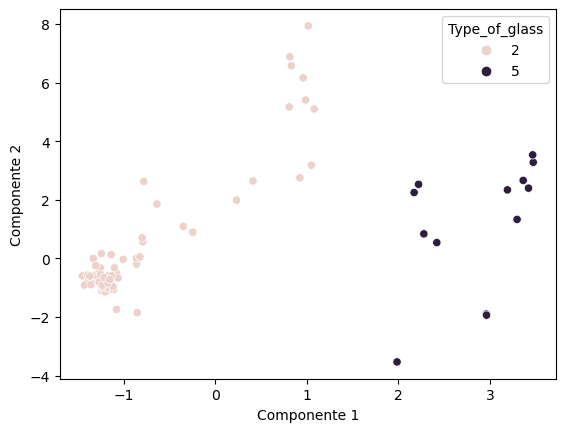

In [17]:
plot_pca(glass_pca, 'Type_of_glass')

DATASET 7: zoo - **SEPARÁVEL**

https://archive.ics.uci.edu/dataset/111/zoo

In [18]:
zoo_pca = retorna_pca_uci(111, 'type')
zoo_pca = zoo_pca[(zoo_pca['type'] == 1) |(zoo_pca['type'] == 2)]

Variação total explicada pelos dois primeiros componentes: 83.73%


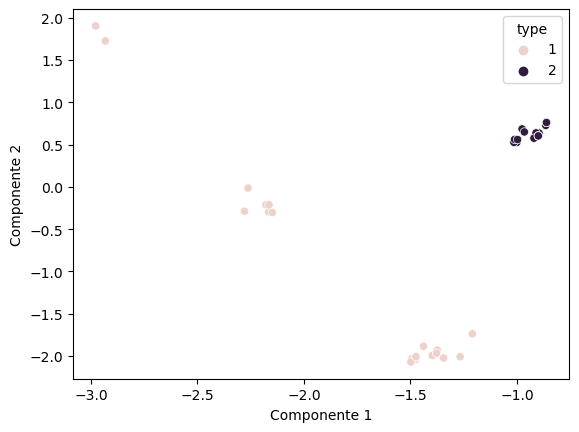

In [19]:
plot_pca(zoo_pca, 'type')